# **Image Sharpening for Medical Imaging**

* As a radiologist, I want to sharpen an X-ray image so that fine details in bones and tissues become more visible, helping me make a more accurate diagnosis.
* **Tasks:**
1. Load the provided X-ray image.
2. Convert to grayscale (if not already).
3. Apply a sharpening kernel (e.g., [[0,-1,0], [-1,5,-1], [0,-1,0]]).
4. Compare the sharpened image to the original.
5. Save the processed image.

## **Importing Libraries**

In [15]:
import cv2
import time
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# **Web Scraping Hand Image**

In [9]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                  'AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/120.0.0.0 Safari/537.36'
}

# Direct file URL from Wikimedia
image_url = "https://upload.wikimedia.org/wikipedia/commons/f/f1/1896_x-rays_of_Physikalischer_Verein%2C_hand_of_man.tif"

r = requests.get(image_url, headers=headers)

with open("xray_hand.tif", "wb") as f:
    f.write(r.content)

print("Image saved as xray_hand.tif")

Image saved as xray_hand.tif


# **Loading The X-ray Image**

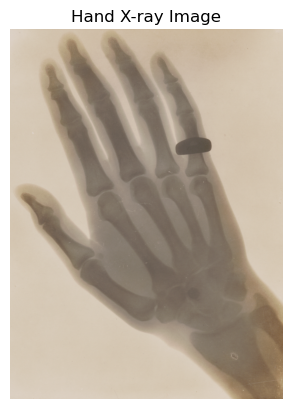

In [12]:
# Loading the image in BGR format using OpenCV.
hand_image_bgr =cv2.imread(r"C:\Users\bbuser\Downloads\xray_hand.tif")

# Converting BGR to RGB for correct color display in matplotlib.
hand_image_rgb = cv2.cvtColor(hand_image_bgr, cv2.COLOR_BGR2RGB)

# Displaying the image.
plt.imshow(hand_image_rgb) # Showing RGB image.
plt.title("Hand X-ray Image")  # Adding a title.
plt.axis("off")  # Hiding the axes.
plt.show()  # Displaying the image.

# **Convert The Image To Grayscale Image**

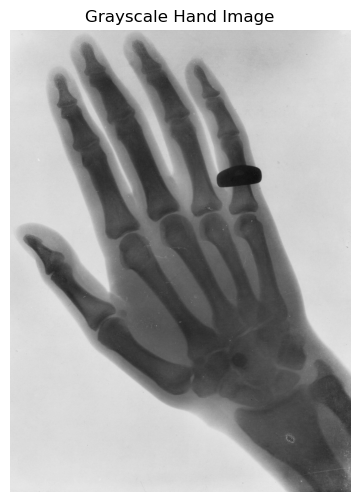

In [13]:
gray_hand_image = cv2.cvtColor(hand_image_rgb, cv2.COLOR_RGB2GRAY)

# Display grayscale image
plt.figure(figsize=(6,6))
plt.imshow(gray_hand_image, cmap='gray') # cmap='gray' ensures grayscale display
plt.title("Grayscale Hand Image")
plt.axis('off')
plt.show()

# **Sharpening The Hand Image**

In [22]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

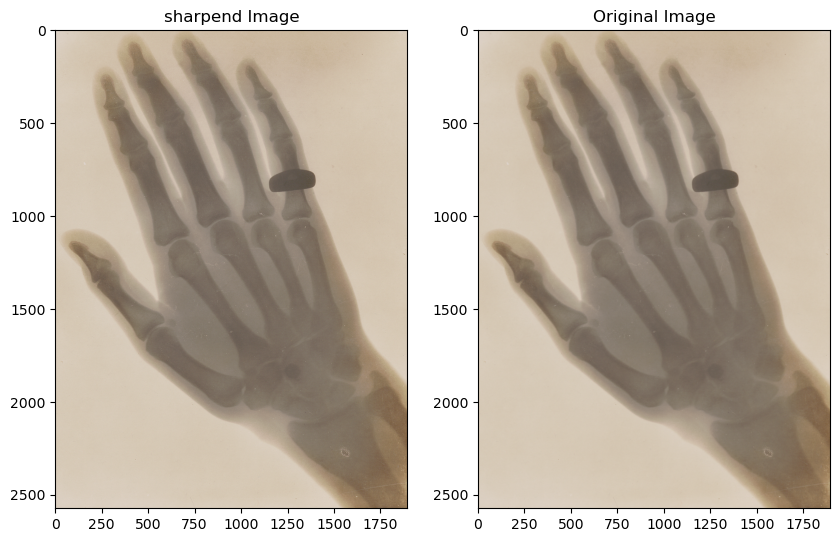

In [21]:
kernal = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpend_image = cv2.filter2D (hand_image_rgb, -1, kernal)
plot_image(shaped_image, hand_image_rgb, "sharpend Image", "Original Image")

# **Saving The Processed Image**

In [23]:
cv2.imwrite("sharpened_hand_image.jpg", sharpend_image)
print("Sharpened image saved as sharpened_hand_image.jpg")

Sharpened image saved as sharpened_hand_image.jpg
